In [1]:
# Basic tools
import pandas as pd
import numpy as np
import math
from collections import Counter
import datetime
import pprint

# Web scraping and cleaning
import re
import json
import requests
from bs4 import BeautifulSoup

# Graph
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('final_eda.csv', index_col=0)

# 1. Linear regression

In [3]:
# split whole datafram into predictive features and target 
X = df.drop('revenue', axis=1)
y = df['revenue']

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [5]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

/Users/GaryKao/Desktop/Springboard/env/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/GaryKao/Desktop/Springboard/env/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.
/Users/GaryKao/Desktop/Springboard/env/lib/python3.6/site-packages/ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """


In [6]:
from sklearn.linear_model import LinearRegression
lin = LinearRegression()
lin.fit(X_train_std, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [7]:
print ('Score of linear regression is {}'.format(lin.score(X_test_std, y_test)))

Score of linear regression is 0.3242313292144872


# 2. Prepare data for classification

In [8]:
df = pd.read_csv('final_eda.csv', index_col=0)

In [9]:
# reset index
df = df.reset_index(drop=True)

# classify revenue variabel into two groups: positive and negative revenue
for i in range(0, len(df)):
    if df.loc[i, 'revenue'] > 0:
        df.loc[i, 'revenue'] = 1
    else:
        df.loc[i, 'revenue'] = 0

In [10]:
# split whole datafram into predictive features and target 
X = df.drop('revenue', axis=1)
y = df['revenue']

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

/Users/GaryKao/Desktop/Springboard/env/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/GaryKao/Desktop/Springboard/env/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.
/Users/GaryKao/Desktop/Springboard/env/lib/python3.6/site-packages/ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """


# 3. Check feature importance by Randomforest classifier

In [13]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(criterion='gini', n_estimators=25, random_state=1)
forest.fit(X_train_std, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=None,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [14]:
# get importances of each feature
importances = forest.feature_importances_

In [15]:
# get feature name of each column
feat_labels = X_train.columns

In [16]:
# arrange the order of importances from larget to small and extract its index
indices = np.argsort(importances)[::-1]

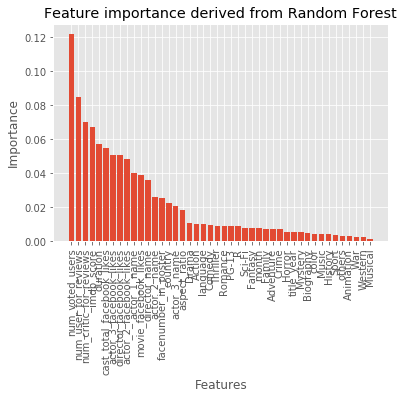

In [17]:
plt.style.use('ggplot')
plt.bar(range(X_train.shape[1]), importances[indices])
plt.xticks(range(X_train.shape[1]), feat_labels[indices], rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature importance derived from Random Forest')
plt.savefig('feature importance.eps', format='eps', dpi=1000, bbox_inches="tight")

# 4. Classification models

# [Logistic regression]

In [18]:
# start with a really basic model
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression(C=100, random_state=1, solver='lbfgs')

In [19]:
# train the model
logit.fit(X_train_std, y_train)

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=1, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [20]:
# predict and check the accuracy
y_pred = logit.predict(X_test_std)

from sklearn.metrics import accuracy_score
print('The accuracy of logistc regression with C=100 on df is {}'.format(accuracy_score(y_test, y_pred)))

The accuracy of logistc regression with C=100 on df is 0.6887254901960784


**search C**

In [21]:
params, score = [], []
for c in np.arange(-5, 5):
    lr = LogisticRegression(C=10.**c, random_state=1, solver='lbfgs')
    lr.fit(X_train_std, y_train)
    predict = lr.predict(X_test_std)
    score.append(accuracy_score(y_test, predict))
    params.append(10.**c)

Text(0, 0.5, 'Accuracy')

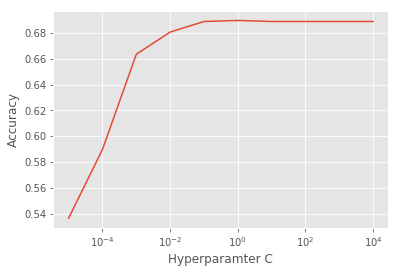

In [22]:
plt.plot(params, score)
plt.xscale('log')
plt.xlabel('Hyperparamter C')
plt.ylabel('Accuracy')

In [23]:
result = dict(zip(params, score))
print('The best C is {} and the best accuracy score is {}'.format(max(result, key=lambda k: result[k]), max(result.values())))

The best C is 1.0 and the best accuracy score is 0.6895424836601307


# [Logistic regression with polynomial features]

In [24]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
poly = PolynomialFeatures(degree=2)
poly_X_train_std = poly.fit_transform(X_train_std)
poly_X_test_std = poly.fit_transform(X_test_std)

In [25]:
params, score = [], []
for c in np.arange(-5, 5):
    lr = LogisticRegression(C=10.**c, random_state=1, solver='lbfgs', max_iter=8000)
    lr.fit(poly_X_train_std, y_train)
    predict = lr.predict(poly_X_test_std)
    score.append(accuracy_score(y_test, predict))
    params.append(10.**c)

/Users/GaryKao/Desktop/Springboard/env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


Text(0, 0.5, 'Accuracy')

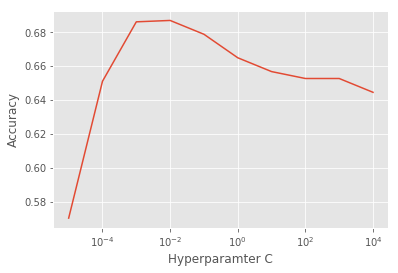

In [26]:
plt.plot(params, score)
plt.xscale('log')
plt.xlabel('Hyperparamter C')
plt.ylabel('Accuracy')

In [27]:
result = dict(zip(params, score))
print('The best C is {} and the best accuracy score is {}'.format(max(result, key=lambda k: result[k]), max(result.values())))

The best C is 0.01 and the best accuracy score is 0.6870915032679739


# [SVM]

In [28]:
from sklearn.svm import SVC
svm = SVC(kernel='linear', C=1.0, probability=True, random_state=1)

In [29]:
svm.fit(X_train_std, y_train)
y_pred = svm.predict(X_test_std)
accuracy_score(y_test, y_pred)

0.6936274509803921

Text(0.5, 1.0, 'ROC Curve')

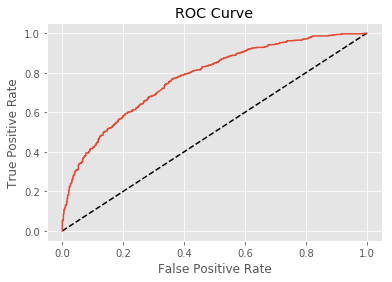

In [30]:
# Import necessary modules
from sklearn.metrics import roc_curve

# Compute predicted probabilities: y_pred_prob
y_pred_prob = svm.predict_proba(X_test_std)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

**look for hyperparameter C for SVM by for-loop**

In [32]:
params, score = [], []
for c in np.arange(-1, 4):
    clf = SVC(kernel='linear', C=10.**c, random_state=1)
    clf.fit(X_train_std, y_train)
    predict = clf.predict(X_test_std)
    score.append(accuracy_score(y_test, predict))
    params.append(10.**c)

Text(0, 0.5, 'Accuracy')

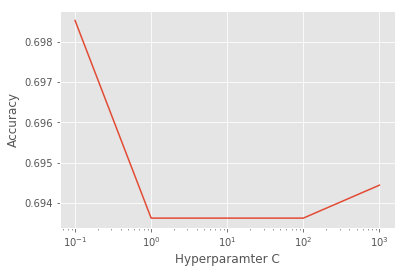

In [33]:
plt.plot(params, score)
plt.xscale('log')
plt.xlabel('Hyperparamter C')
plt.ylabel('Accuracy')

In [35]:
result = dict(zip(params, score))
print('The best C for SVM is {} and accuracy score is {}'.format(max(result, key= lambda k: result[k]), max(result.values())))

The best C for SVM is 0.1 and accuracy score is 0.6985294117647058


**look for hyperparameter C for SVM by GridSearch CV**

In [37]:
# Import necessary modules
from sklearn.model_selection import GridSearchCV

# Setup the hyperparameter grid
c = np.logspace(-5, 3, 10)
param_grid = {'C': c}

# Instantiate a logistic regression classifier: logreg
svm = SVC(kernel='linear', random_state=1)

# Instantiate the GridSearchCV object: logreg_cv
svm_cv = GridSearchCV(svm, param_grid, cv=5)

# Fit it to the data
svm_cv.fit(X_train_std, y_train)

# Print the tuned parameters and score
print("Tuned svm Parameters: {}".format(svm_cv.best_params_)) 
print("Best score is {}".format(svm_cv.best_score_))

Tuned svm Parameters: {'C': 16.681005372000556}
Best score is 0.6901260504201681


In [39]:
# test the hold-out data
print ('The best C from SVM grid search is {} and the accuracy score is {}'.format(svm_cv.best_params_, accuracy_score(y_test, svm_cv.predict(X_test_std))))

The best C from SVM grid search is {'C': 16.681005372000556} and the accuracy score is 0.6936274509803921


# [Kernal SVM]

In [40]:
from sklearn.svm import SVC
svm_rbf = SVC(kernel='rbf', gamma = 0.1, C=1.0, random_state=1)
svm_rbf.fit(X_train_std, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=1, shrinking=True,
  tol=0.001, verbose=False)

In [42]:
print (accuracy_score(y_train, svm_rbf.predict(X_train_std)), accuracy_score(y_test, svm_rbf.predict(X_test_std)))

0.9436274509803921 0.6478758169934641


**look for the best gamma and C in kernel SVM**

In [43]:
# Import necessary modules
from sklearn.model_selection import GridSearchCV

# Setup the hyperparameter grid
r = np.logspace(-5, 2, 10)
c = np.logspace(-5, 2, 10)
param_grid = {'gamma': 10.**r, 'C': 10.**c}

# Instantiate a logistic regression classifier: logreg
svm_rbf = SVC(kernel='rbf', random_state=1)

# Instantiate the GridSearchCV object: logreg_cv
svm_rbf_cv = GridSearchCV(svm_rbf, param_grid, cv=5)

# Fit it to the data
svm_rbf_cv.fit(X_train_std, y_train)

# Print the tuned parameters and score
print("Tuned svm_rbf Parameters: {}".format(svm_rbf_cv.best_params_)) 
print("Best score is {}".format(svm_rbf_cv.best_score_))

Tuned svm_rbf Parameters: {'C': 1.1951608769425046, 'gamma': 1.0000230261160268}
Best score is 0.5549719887955182


In [45]:
# test hold-out data
print ('The best gamma is {} and the best C is {}. The accuracy score is {}'.format(1, 1, accuracy_score(y_test, svm_rbf_cv.predict(X_test_std))))

The best gamma is 1 and the best C is 1. The accuracy score is 0.5506535947712419


# [KNN]

In [46]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
knn.fit(X_train_std, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [48]:
print (accuracy_score(y_train, knn.predict(X_train_std)), accuracy_score(y_test, knn.predict(X_test_std)))

0.761204481792717 0.6388888888888888


**look for best K with KNN (Euclidean)**

In [49]:
train_score = []
test_score = []
for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
    knn.fit(X_train_std, y_train)
    predict1 = knn.predict(X_train_std)
    score1 = accuracy_score(y_train, predict1)
    train_score.append(score1)
    predict2 = knn.predict(X_test_std)
    score2 = accuracy_score(y_test, predict2)
    test_score.append(score2)

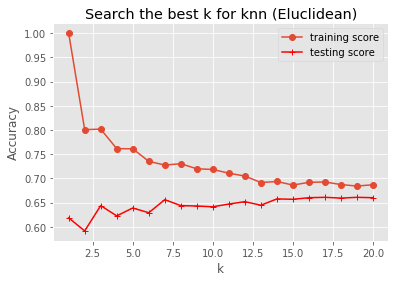

In [50]:
k_range = range(1, 21)
plt.plot(k_range, train_score, marker='o', label='training score')
plt.plot(k_range, test_score, marker='+', color='red', label='testing score')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Search the best k for knn (Eluclidean)')
plt.legend()

In [52]:
result= dict(zip(k_range, test_score))
print ('The best K is {} and the accuracy score is {}'.format(max(result, key=lambda k: result[k]),max(test_score)))

The best K is 17 and the accuracy score is 0.6609477124183006


**look for the best K with KNN (Manhattan)**

In [53]:
train_score = []
test_score = []
for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=1)
    knn.fit(X_train_std, y_train)
    predict1 = knn.predict(X_train_std)
    score1 = accuracy_score(y_train, predict1)
    train_score.append(score1)
    predict2 = knn.predict(X_test_std)
    score2 = accuracy_score(y_test, predict2)
    test_score.append(score2)

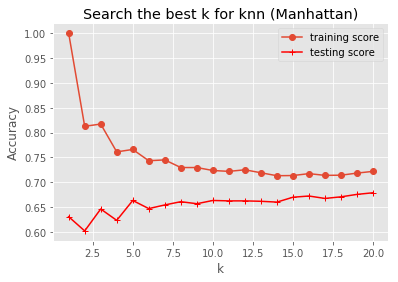

In [54]:
k_range = range(1, 21)
plt.plot(k_range, train_score, marker='o', label='training score')
plt.plot(k_range, test_score, marker='+', color='red', label='testing score')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Search the best k for knn (Manhattan)')
plt.legend()

In [55]:
result= dict(zip(k_range, test_score))
print ('The best K is {} and the accuracy score is {}'.format(max(result, key=lambda k: result[k]),max(test_score)))

The best K is 20 and the accuracy score is 0.678921568627451


# [Tree]

In [56]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=1)
tree.fit(X_train_std, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

In [58]:
print (accuracy_score(y_train, tree.predict(X_train_std)), accuracy_score(y_test, tree.predict(X_test_std)))

0.6708683473389355 0.636437908496732


**look for the best max_depth with tree**

In [59]:
depth = range(1, 21)
train_score = []
test_score = []
for t in depth:
    tree = DecisionTreeClassifier(criterion='gini', max_depth=t, random_state=1)
    tree.fit(X_train_std, y_train)
    predict1 = tree.predict(X_train_std)
    score1 = accuracy_score(y_train, predict1)
    train_score.append(score1)
    predict2 = tree.predict(X_test_std)
    score2 = accuracy_score(y_test, predict2)
    test_score.append(score2)

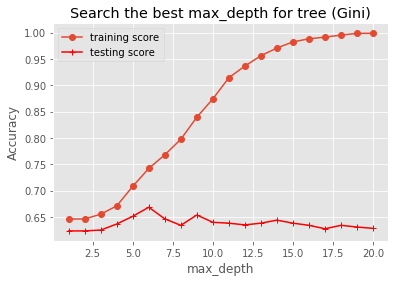

In [60]:
plt.plot(depth, train_score, marker='o', label='training score')
plt.plot(depth, test_score, marker='+', color='red', label='testing score')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.title('Search the best max_depth for tree (Gini)')
plt.legend(loc=2)

In [62]:
result=dict(zip(depth, test_score))
print (accuracy_score(y_train, tree.predict(X_train_std)), accuracy_score(y_test, tree.predict(X_test_std)))

0.9985994397759104 0.6282679738562091


# [Random forest]

In [63]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(criterion='gini', n_estimators=25, random_state=1)
forest.fit(X_train_std, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=None,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [64]:
print (accuracy_score(y_train, forest.predict(X_train_std)), accuracy_score(y_test, forest.predict(X_test_std)))

0.9989495798319328 0.7050653594771242


**look for the best n_estimators**

In [65]:
num = np.arange(5, 105, 5)
train_score = []
test_score = []
for i in num:
    forest = RandomForestClassifier(criterion='gini', n_estimators=i, random_state=1)
    forest.fit(X_train_std, y_train)
    predict1 = forest.predict(X_train_std)
    score1 = accuracy_score(y_train, predict1)
    train_score.append(score1)
    predict2 = forest.predict(X_test_std)
    score2 = accuracy_score(y_test, predict2)
    test_score.append(score2)

(0.65, 1.05)

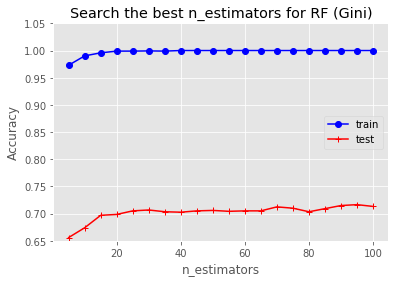

In [67]:
plt.plot(num, train_score, marker='o', color='blue', label='train')
plt.plot(num, test_score, marker='+', color='red', label='test')
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.title('Search the best n_estimators for RF (Gini)')
plt.legend(loc=7)
plt.ylim(0.65, 1.05)

In [68]:
result=dict(zip(num, test_score))
print ('The best n_estimator is {} and the accuracy score is {}'.format(max(result, key=lambda k: result[k]),max(test_score)))

The best n_estimator is 95 and the accuracy score is 0.7165032679738562


**Randomized search CV**

In [69]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [70]:
forest = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = forest, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train_std, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   29.6s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  4.7min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid='warn', n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [71]:
best = rf_random.best_params_
print ('The best parametmers are {} and the accuracy is {}'.format(best, accuracy_score(y_test, rf_random.predict(X_test_std))))

The best parametmers are {'n_estimators': 800, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 40, 'bootstrap': True} and the accuracy is 0.7075163398692811


**Next, I use random parameters as a base to search the best combination in GridSearchCV**

In [72]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [20, 30, 40, 50, 60],
    'max_features': ['sqrt'],
    'min_samples_leaf': [1, 2, 3],
    'min_samples_split': [2, 5, 10],
    'n_estimators': [600, 700, 800, 900, 1000]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [73]:
grid_search.fit(X_train_std, y_train)

Fitting 3 folds for each of 225 candidates, totalling 675 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   21.0s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done 675 out of 675 | elapsed:  6.9min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'bootstrap': [True], 'max_depth': [20, 30, 40, 50, 60], 'max_features': ['sqrt'], 'min_samples_leaf': [1, 2, 3], 'min_samples_split': [2, 5, 10], 'n_estimators': [600, 700, 800, 900, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [74]:
print ('The best parametmers are {} and the accuracy is {}'.format(grid_search.best_params_, accuracy_score(y_test, grid_search.predict(X_test_std))))

The best parametmers are {'bootstrap': True, 'max_depth': 40, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 1000} and the accuracy is 0.7156862745098039


# [Gradient boosting]

In [75]:
from sklearn.ensemble import GradientBoostingClassifier
gbrt=GradientBoostingClassifier(random_state=1, n_estimators=100)
gbrt.fit(X_train_std, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=1,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [76]:
gbrt.score(X_test_std, y_test)

0.690359477124183

In [96]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [3, 6, 7, 8, 9],
    'subsample': [0.2, 0.4, 0.6, 0.8, 1],
    'n_estimators': [100, 200, 300, 400, 500]
}
# Create a based model
gbrt = GradientBoostingClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = gbrt, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [97]:
grid_search.fit(X_train_std, y_train)

Fitting 3 folds for each of 125 candidates, totalling 375 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 375 out of 375 | elapsed:  4.7min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_sampl...      subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': [3, 6, 7, 8, 9], 'subsample': [0.2, 0.4, 0.6, 0.8, 1], 'n_estimators': [100, 200, 300, 400, 500]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [99]:
print ('The best parametmers are {} and the accuracy is {}'.format(grid_search.best_params_, accuracy_score(y_test, grid_search.predict(X_test_std))))

The best parametmers are {'max_depth': 8, 'n_estimators': 500, 'subsample': 0.8} and the accuracy is 0.7140522875816994
